In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

# Загрузка данных и разделение на тестовую и обучающую выборки

In [5]:
# Загрузка датасета
df = pd.read_csv('CC50_data.csv')
df.head()

,"CC50, mM log10",MaxAbsEStateIndex,MaxAbsEStateIndex log10,MaxEStateIndex,MaxEStateIndex log10,MinAbsEStateIndex,MinAbsEStateIndex log10,MinEStateIndex,qed,qed log10,...,fr_piperdine,fr_piperzine,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_term_acetylene,fr_tetrazole,fr_thiophene,fr_urea
0,2.244234,5.094096,0.707067,5.094096,0.707067,0.387225,-0.412037,0.387225,0.417362,-0.379487,...,0,0,0,0,0,0,0,0,0,0
1,0.732620,3.961417,0.597851,3.961417,0.597851,0.533868,-0.272566,0.533868,0.462473,-0.334914,...,0,0,0,0,0,0,0,0,0,0
2,2.207210,2.627117,0.419479,2.627117,0.419479,0.543231,-0.265016,0.543231,0.260923,-0.583488,...,0,0,0,2,0,0,0,0,0,0
3,2.032843,5.097360,0.707345,5.097360,0.707345,0.390603,-0.408265,0.390603,0.377846,-0.422686,...,0,0,0,0,0,0,0,0,0,0
4,2.143861,5.150510,0.711850,5.150510,0.711850,0.270476,-0.567871,0.270476,0.429038,-0.367504,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Определим целевую переменную и предикторы
X = df.drop(columns=['CC50, mM log10'])  # предикторы (все колонки, кроме IC50)
y = (df['CC50, mM log10'] > df['CC50, mM log10'].median()).astype(int)  # целевая переменная на основе IC50

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизируем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение моделей

Для обучения были выбраны четыре модели: логистическая регрессия, Дерево решений, случайный лес и градиантны бустинг.  
Каждая модель имеет свои преимущества, например логистическая регрессия проста в интерпретации и хорошо работает на линейных данных, что позволяет легко понять влияние отдельных признаков на результат. Дерево решений является интуитивно понятным и наглядным, что делает его удобным для визуализации процессов принятия решений. Случайный лес, в свою очередь, обладает высокой устойчивостью к переобучению благодаря созданию множества деревьев и объединению их результатов, что значительно улучшает точность предсказаний. Градиентный бустинг, имея возможность уменьшать ошибку модели, использует комбинацию слабых моделей и может достичь высокой точности на сложных данных, однако требует более тщательной настройки гиперпараметров.

Каждая из этих моделей была протестирована на нашем наборе данных, чтобы определить наилучший подход для достижения максимальной производительности в задаче.

In [12]:
# Инициализируем модели
models = {
    'Логистическая регрессия': LogisticRegression(),
    'Дерево решений': DecisionTreeClassifier(),
    'Случайный лес': RandomForestClassifier(),
    'Градиентный бустинг': GradientBoostingClassifier()}

In [14]:
# Обучаем и оцениваем модели
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1}


Выведем полученные результаты аккуратным списком.

In [15]:
for model_name, metrics in results.items():
    print(f"Модель: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-score: {metrics['F1-score']:.4f}")
    print("="*30)

Модель: Логистическая регрессия
Accuracy: 0.7662
Precision: 0.8085
Recall: 0.7238
F1-score: 0.7638
Модель: Дерево решений
Accuracy: 0.6965
Precision: 0.7340
Recall: 0.6571
F1-score: 0.6935
Модель: Случайный лес
Accuracy: 0.7861
Precision: 0.8298
Recall: 0.7429
F1-score: 0.7839
Модель: Градиентный бустинг
Accuracy: 0.8060
Precision: 0.8438
Recall: 0.7714
F1-score: 0.8060


Логистическая регрессия показала устойчивое качество: точность и F1-меру чуть выше 0.76. Модель хорошо сбалансирована, имеет высокое значение precision, но recall немного ниже, что может указывать на некоторое количество пропущенных положительных примеров.

Дерево решений продемонстрировало худшие показатели среди рассмотренных моделей: точность и полнота здесь ниже остальных. Такая модель проще, склонна к переобучению на небольших данных и хуже обобщает информацию.

Случайный лес дал лучшие результаты по сравнению с предыдущими двумя моделями. Эта ансамблевая модель оказалась наиболее сбалансированной после градиентного бустинга, улучшила как точность, так и F1-меру.

Градиентный бустинг стал лидером эксперимента: модель показала наилучшее качество по всем основным метрикам, в том числе по точности и F1-мере. Это говорит о высокой эффективности и умении хорошо выявлять целевой класс на подготовленном датасете.

В целом, по совокупности метрик, градиентный бустинг показал себя лучше остальных моделей.

# Выводы

Для наглядности необходимо визуализировать данные. Это поможет дать окончательный вывод.

In [18]:
#  Подготовка данных
models = list(results.keys())
metrics_list = ["Accuracy", "Precision", "Recall", "F1-score"]

# Создаем матрицу значений [модель x метрика]
values = np.array([
    [results[model][metric] for metric in metrics_list]
    for model in models])

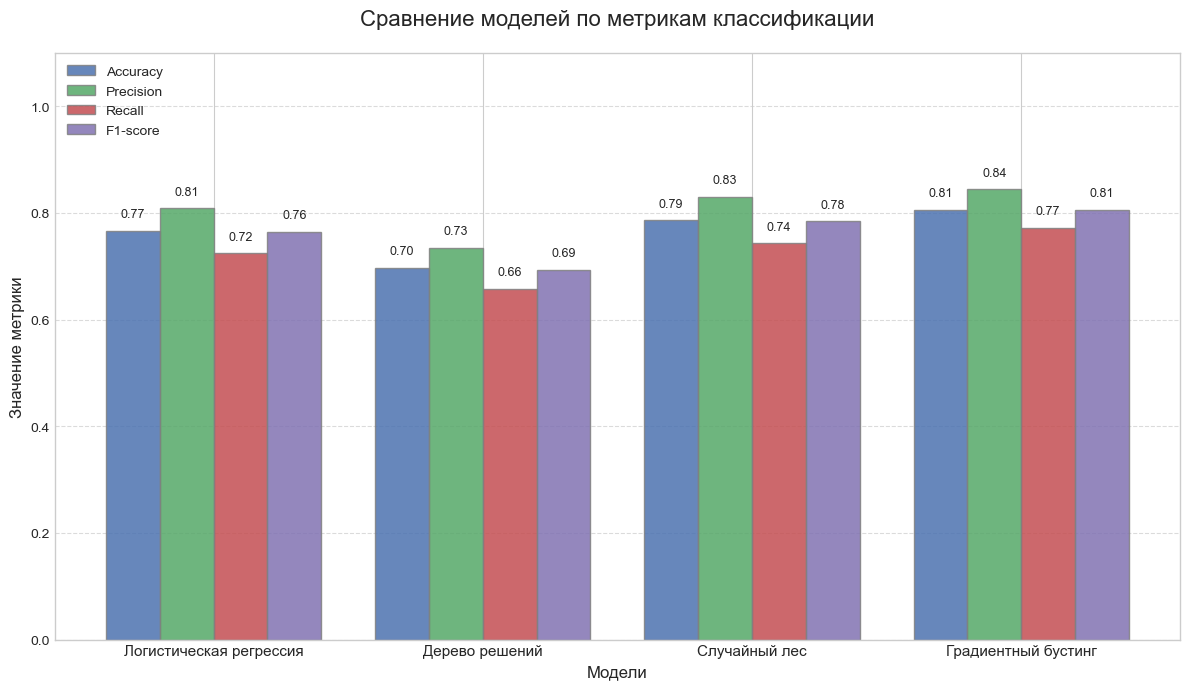

In [22]:
# Настройка стиля
plt.style.use('seaborn-v0_8-whitegrid')
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']  # Цвета для метрик

# Групповая диаграмма
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.2  # Ширина столбца
x_pos = np.arange(len(models))  # Позиции для групп моделей

# Рисуем столбцы для каждой метрики
for i, metric in enumerate(metrics_list):
    ax.bar(
        x_pos + i * bar_width,  # Смещение для группировки
        values[:, i], 
        width=bar_width,
        label=metric,
        color=colors[i],
        edgecolor='grey',
        alpha=0.85)

# Оформление
ax.set_title('Сравнение моделей по метрикам классификации', fontsize=16, pad=20)
ax.set_xlabel('Модели', fontsize=12)
ax.set_ylabel('Значение метрики', fontsize=12)
ax.set_xticks(x_pos + bar_width * 1.5)
ax.set_xticklabels(models, fontsize=11)
ax.set_ylim(0, 1.1)  # Диапазон для метрик классификации
ax.legend(loc='upper left', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Добавление значений на столбцы
for i, model in enumerate(models):
    for j, metric in enumerate(metrics_list):
        height = values[i, j]
        ax.annotate(
            f'{height:.2f}',
            xy=(x_pos[i] + j * bar_width, height + 0.02),
            ha='center', 
            va='bottom',
            fontsize=9)

plt.tight_layout()
plt.show()

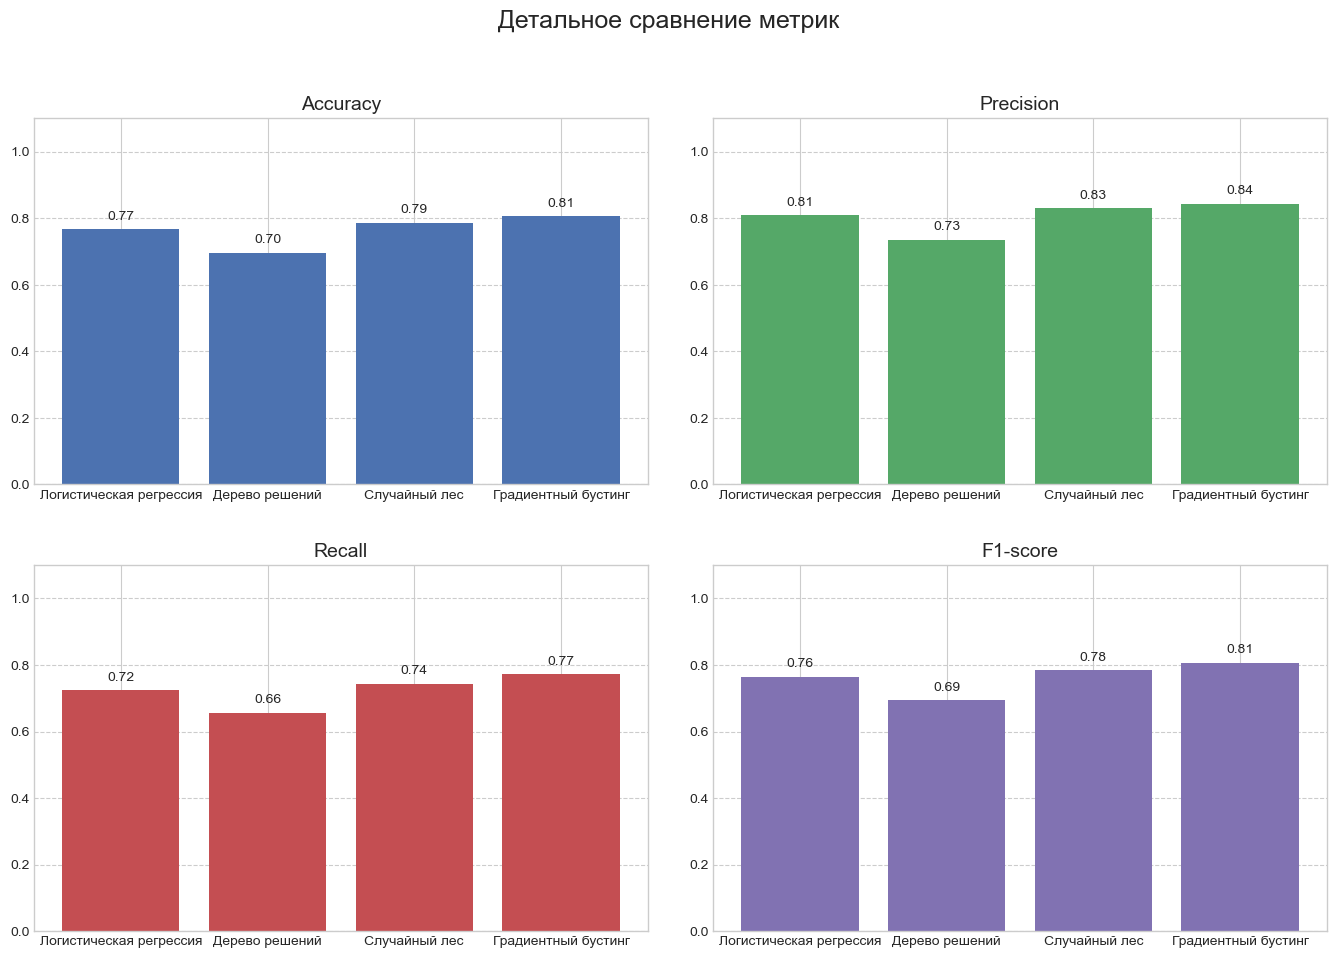

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Детальное сравнение метрик', fontsize=18)

for i, metric in enumerate(metrics_list):
    ax = axs[i//2, i%2]
    ax.bar(models, values[:, i], color=colors[i])
    ax.set_title(metric, fontsize=14)
    ax.set_ylim(0, 1.1)
    ax.grid(axis='y', linestyle='--')
    
    # Добавление значений
    for j, val in enumerate(values[:, i]):
        ax.annotate(f'{val:.2f}', xy=(j, val+0.03), ha='center', fontsize=10)

plt.tight_layout(pad=3.0)

В целом, все четыре модели неплохо себя показали. Как видно, логистическая регрессия, случайный лес и градиентный бустинг показали себя лучше всего, и их результаты отличаются незначительно. Лидер с небольшим преимуществом — градиентный бустинг. Дерево решений — явный аутсайдер, хоть и отстает совсем немного.

Стоит отметить, что даже простые модели, такие как логистическая регрессия, обеспечивают достаточно высокие значения метрик качества, что указывает на хорошую информативность признаков и адекватный выбор целевого признака. Наилучшее качество на тестовой выборке показал градиентный бустинг, что ожидаемо, учитывая его способность эффективно справляться с небольшими выборками и сложными взаимосвязями между признаками. Случайный лес выступил немного слабее градиентного бустинга, но заметно обошёл дерево решений, что подтверждает необходимость использования ансамблевых методов при работе с подобными данными.

В заключение, для дальнейшего использования рекомендуется обратить внимание на градиентный бустинг или случайный лес, поскольку эти модели показали наиболее стабильные и высокие результаты на имеющемся датасете.